<a href="https://colab.research.google.com/github/Probingbug/NN_from_scratch/blob/main/Project_Fashion_MNIST_Dataset_Sorting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


**LOADING DATASET**

60000 training dataset
10000 testing data

In [98]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels.

Before taking any step, it is important to know about the shape and type of the data.

In [99]:
X_train_full.shape

(60000, 28, 28)

In [100]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a ( smaller) training set. We also scale the pixel intensities down to convert them to floats, dividing them by 255

In [101]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0


In [102]:
len(X_valid)

5000

plot an immage using Matplotlib's imshow() function, with a 'binary' color map :

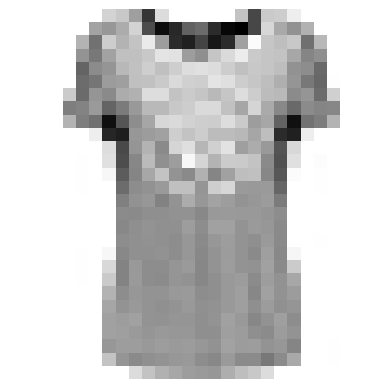

In [103]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [104]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [105]:
len(y_train)

55000

In [106]:
y_train[1]

np.uint8(0)

here are the corresponding class names :

In [107]:
class_names = ['t-shirt/top','Trouser','pullover','Dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [108]:
class_names[y_train[1]]

't-shirt/top'

In [109]:
X_valid.shape

(5000, 28, 28)

In [110]:
X_train.shape

(55000, 28, 28)

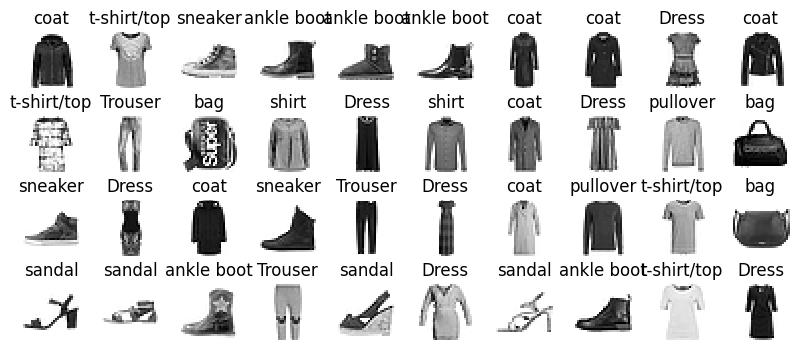

In [111]:
n_rows = 4
n_cols = 10
plt.figure( figsize = (n_cols,n_rows))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap = 'binary', interpolation = 'nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()




In [112]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [113]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [114]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [115]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

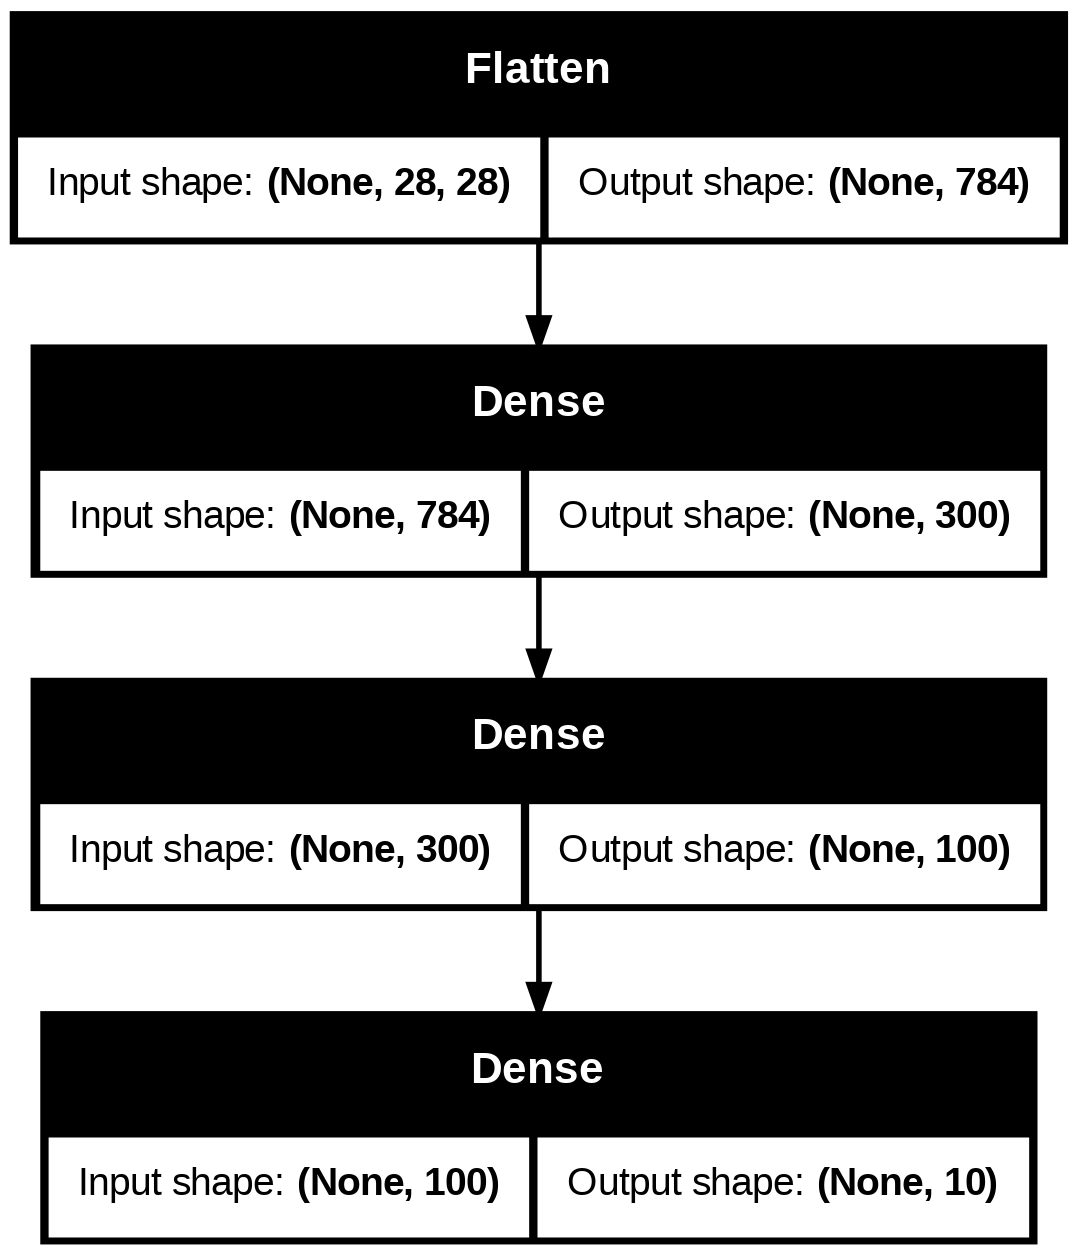

In [116]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [117]:
model.layers[1]

<Dense name=dense, built=True>

In [118]:
weights,biases = model.layers[1].get_weights()


In [119]:
weights

array([[-0.05991725,  0.06837207, -0.00977591, ..., -0.00381188,
         0.04430391,  0.05181783],
       [-0.01361405, -0.02122582, -0.05240478, ..., -0.01431511,
         0.06370457, -0.04324819],
       [ 0.05628462,  0.02086599,  0.01780998, ...,  0.02506518,
        -0.01994982,  0.02420497],
       ...,
       [-0.00123973, -0.03466503, -0.02294562, ..., -0.05673525,
        -0.03388322, -0.04703802],
       [ 0.06770605,  0.01232685, -0.02550453, ...,  0.06555569,
        -0.04114127,  0.04718122],
       [-0.00519148,  0.05643065,  0.03137076, ..., -0.0030414 ,
        -0.01121484,  0.04830173]], dtype=float32)

In [120]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [121]:
weights.shape

(784, 300)

In [122]:
biases.shape

(300,)

In [123]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [124]:
history = model.fit(X_train, y_train, epochs = 15, validation_data = (X_valid, y_valid))

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7802 - loss: 0.6164 - val_accuracy: 0.8596 - val_loss: 0.3753
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8623 - loss: 0.3737 - val_accuracy: 0.8772 - val_loss: 0.3432
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8778 - loss: 0.3301 - val_accuracy: 0.8796 - val_loss: 0.3261
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8868 - loss: 0.3064 - val_accuracy: 0.8796 - val_loss: 0.3383
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8936 - loss: 0.2855 - val_accuracy: 0.8852 - val_loss: 0.3223
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8998 - loss: 0.2678 - val_accuracy: 0.8840 - val_loss: 0.3329
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9040 - loss: 0.2568 - val_accuracy: 0.8870 - val_loss: 0.3325
Epoch 8/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9086 - loss: 0.2452 - 

In [125]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

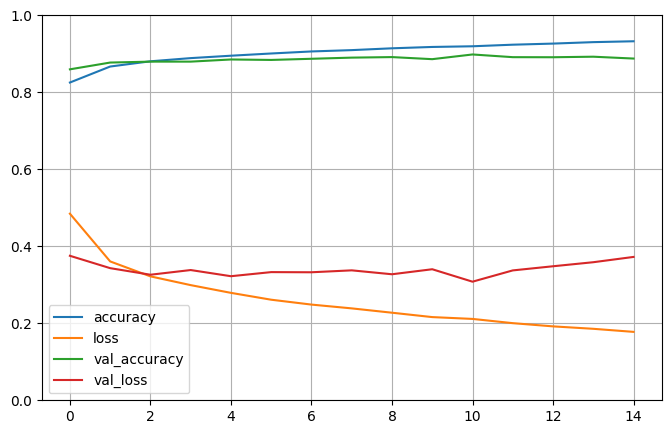

In [126]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [127]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8716 - loss: 0.4007


[0.3912392258644104, 0.8772000074386597]

**TESTING**

In [128]:
X_new = X_test[:3]


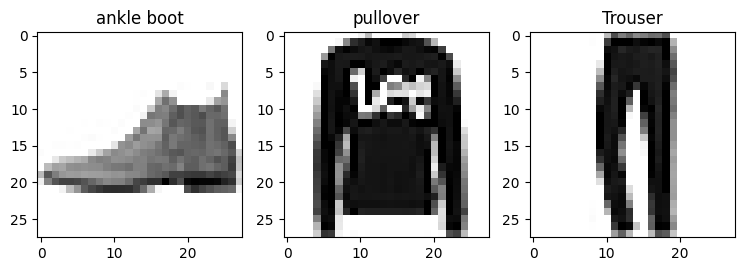

In [130]:
plt.figure(figsize = (9,9))
for index, image in enumerate(X_new):
    plt.subplot(1,3,index + 1)
    plt.imshow(image, cmap = 'binary', interpolation = 'nearest')
    # plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**Let's see what our neural network predicts**

In [132]:
y_pred = np.argmax(model.predict(X_new), axis =-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


array([9, 2, 1])

In [133]:
np.array(class_names)[y_pred]

array(['ankle boot', 'pullover', 'Trouser'], dtype='<U11')

In [134]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

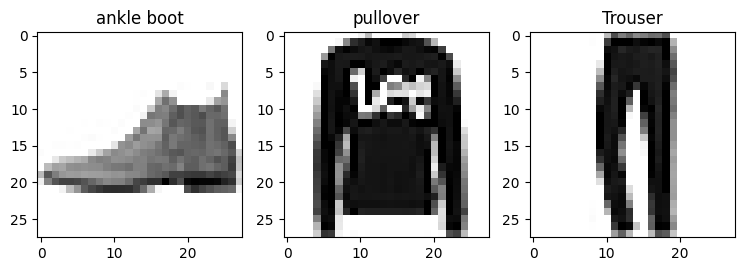

In [135]:
plt.figure(figsize = (9,9))
for index, image in enumerate(X_new):
    plt.subplot(1,3,index + 1)
    plt.imshow(image, cmap = 'binary', interpolation = 'nearest')
    plt.title(class_names[y_new[index]], fontsize = 12)
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

**OUR MODEL PERFECTLY CLASSIFY THE DATA**